### Exploratory Data Analysis (EDA)

This notebook is used to explore the data and understand the relationships between the variables. The main goal is to identify the most important variables that can be used to predict the reservoir levels. The dataset used in this notebook is the final dataset obtained from ACA and Meteocat.

*-- To convert to HTML run: jupyter nbconvert --to html EDA.ipynb --*

In [1]:
# Import cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### ACA Dataset

In [2]:
# Read the final and cleaned dataset from ACA (reservoirs)
df_aca = pd.read_csv('model/final_data/processed_aca.csv')
print(df_aca.head())

         date      0     1     2      3      4     5       6      7      8
0  2000-01-01  31.02  5.61  1.48  19.14  63.14  6.53  122.26  90.41  29.27
1  2000-01-02  31.02  5.61  1.48  19.02  63.53  6.53  122.33  90.35  29.35
2  2000-01-03  31.02  5.60  1.48  18.90  63.31  6.54  122.11  90.30  29.43
3  2000-01-04  31.02  5.60  1.47  18.78  63.20  6.54  122.37  90.24  29.51
4  2000-01-05  31.04  5.61  1.46  18.66  63.23  6.54  121.82  90.17  29.59


In [3]:
# Read the relationship between sensor codes and the reservoir names for further understanding
df_sensors = pd.read_csv('model/final_data/sensor_codes.csv')
# Create a map between the sensor codes and the reservoir names
sensor_map = dict(zip(df_sensors['sensor_code'], df_sensors['name']))
print(df_sensors.head())

   sensor_code                                             name
0            0        Embassament de Darnius Boadella (Darnius)
1            1      Embassament de Foix (Castellet i la Gornal)
2            2                       Embassament de Riudecanyes
3            3  Embassament de Sant Ponç (Clariana de Cardener)
4            4             Embassament de Sau (Vilanova de Sau)


In [4]:
df_aca.describe().T

,count,mean,std,min,25%,50%,75%,max
0,9092.0,34.230326,13.761716,6.860,23.0475,33.775,46.0000,60.15
1,9092.0,3.585415,0.551182,1.780,3.4500,3.700,3.7500,5.67
2,9092.0,2.314233,1.409524,0.087,1.2900,1.950,3.1700,5.32
3,9092.0,18.042743,5.325099,2.130,15.2375,19.990,22.3200,24.38
4,9092.0,101.020372,37.302317,1.710,79.7675,107.730,130.8925,164.89
5,9092.0,6.731598,3.927467,0.077,3.2975,6.595,10.7025,12.20
6,9092.0,159.796801,55.935188,41.490,117.0900,172.385,210.8800,247.44
7,9092.0,76.223944,25.297298,20.480,58.6700,81.220,98.8225,109.39
8,9092.0,52.595055,20.850615,9.620,35.3400,56.635,70.4425,81.38


In [5]:
# Scale all the sensor values to be between 0 (value 0) and 1 (max value) (scale them individually)
df_aca_scaled = df_aca.copy()
for column in df_aca.columns[1:]:
    df_aca_scaled[column] = (df_aca[column]) / (df_aca[column].max())
df_aca.describe().T

,count,mean,std,min,25%,50%,75%,max
0,9092.0,34.230326,13.761716,6.860,23.0475,33.775,46.0000,60.15
1,9092.0,3.585415,0.551182,1.780,3.4500,3.700,3.7500,5.67
2,9092.0,2.314233,1.409524,0.087,1.2900,1.950,3.1700,5.32
3,9092.0,18.042743,5.325099,2.130,15.2375,19.990,22.3200,24.38
4,9092.0,101.020372,37.302317,1.710,79.7675,107.730,130.8925,164.89
5,9092.0,6.731598,3.927467,0.077,3.2975,6.595,10.7025,12.20
6,9092.0,159.796801,55.935188,41.490,117.0900,172.385,210.8800,247.44
7,9092.0,76.223944,25.297298,20.480,58.6700,81.220,98.8225,109.39
8,9092.0,52.595055,20.850615,9.620,35.3400,56.635,70.4425,81.38


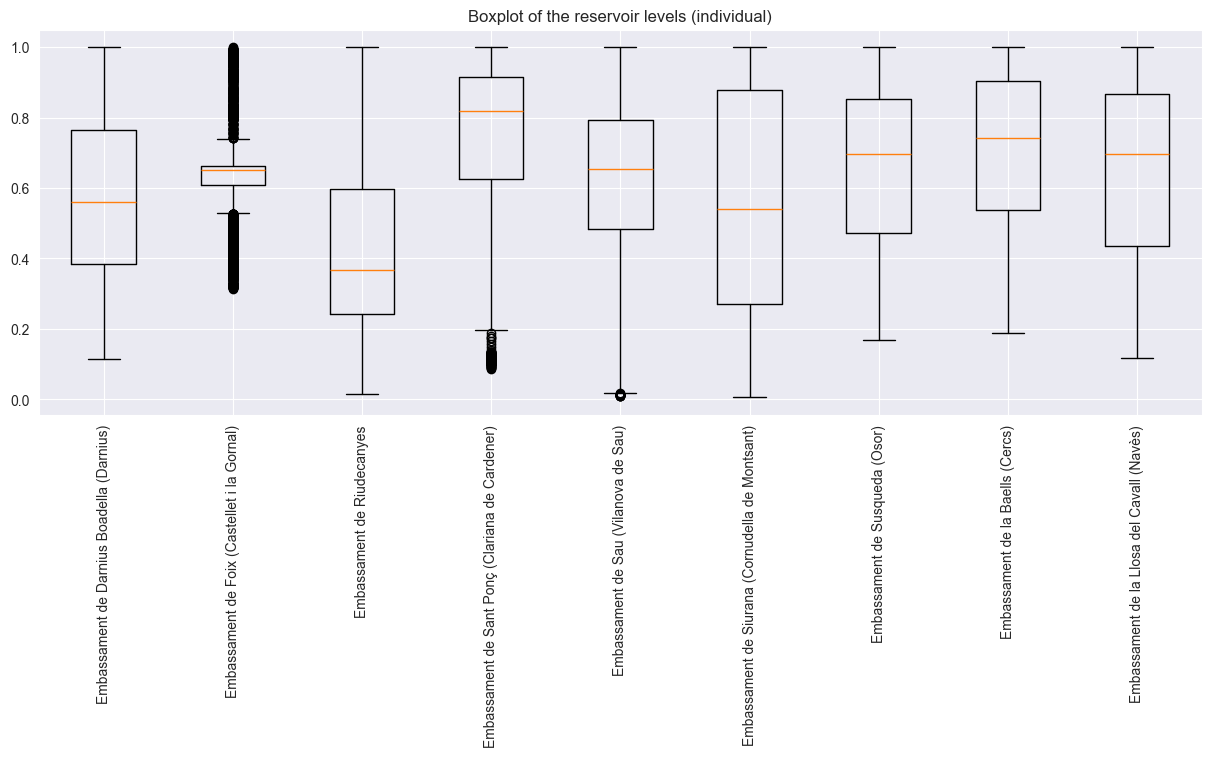

In [6]:
# Boxplot of the reservoir levels (individual)
plt.figure(figsize=(15, 5))
plt.boxplot(df_aca_scaled.iloc[:, 1:].values)
plt.xticks(np.arange(1, len(df_aca_scaled.columns)), [sensor_map[int(i)] for i in df_aca_scaled.columns[1:]], rotation=90)
plt.title('Boxplot of the reservoir levels (individual)')
plt.show()

En la figura anterior, es pot apreciar el comportament de cadascuna de les variables havent-les escalat entre 0 i el seu valor màxim. Així doncs, es pot apreciar quina és la variablitat de les dades en referència als màxims històrics dels que es disposa i, per tant, si la tendència dels embassaments, de manera individual, és a tenir els seus nivells més alts o més baixos que la mitjana. S'observa un comportament relativament similar en la majoria dels embassaments, amb l'excepció de l'embassament de Foix (en el que s'observa una concentració major dels seus valors) i en l'embassament de Riudecanyes, que generalment es troba en nivells més baixos que la resta.
Coincideix, d'altra banda, amb que són els embassaments amb una capacitat més reduïda, per la qual cosa és més fàcil que els seus nivells tinguin un comportament lleugerament diferent.

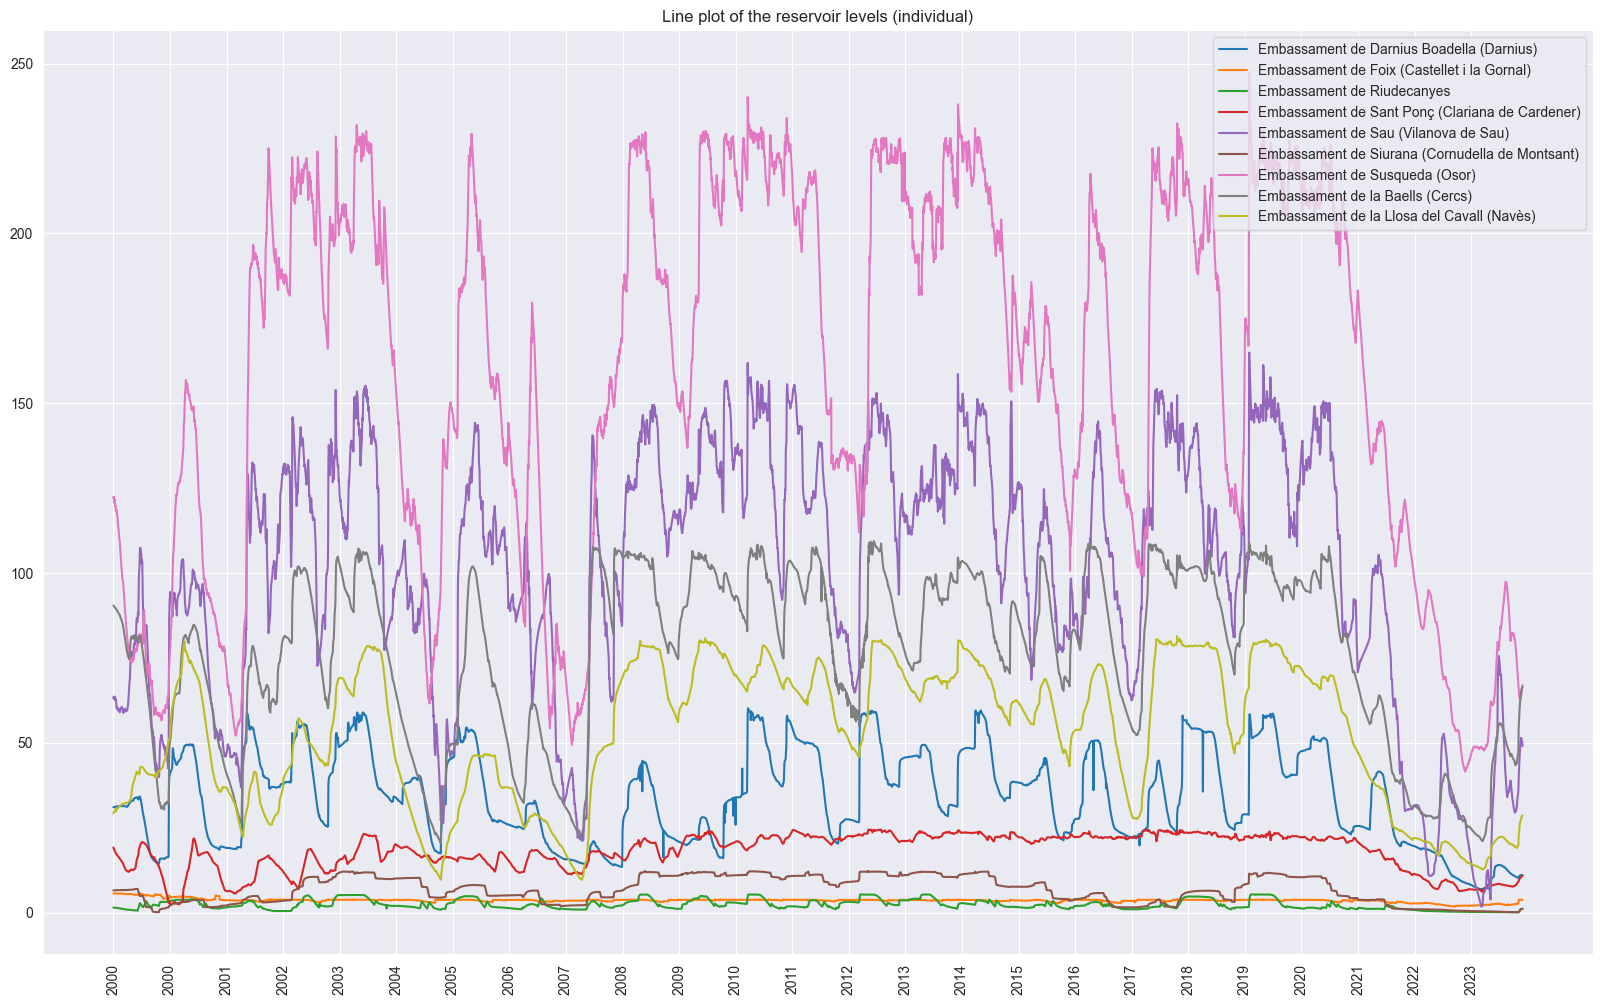

In [7]:
# Line plot of the reservoir levels (individual)
plt.figure(figsize=(20, 12))
plt.plot(df_aca.iloc[:, 1:])
plt.legend([sensor_map[int(i)] for i in df_aca.columns[1:]], loc='upper right')
plt.title('Line plot of the reservoir levels (individual)')
# Adjust the x-axis to show the dates (only years, day 1/1/XXXX) and showing only year number
plt.xticks(np.arange(0, len(df_aca), 365), [date.split('-')[0] for date in df_aca['date'][::365]], rotation=90)
plt.show()

En el gràfic anterior s'observa el volum d'aigua de cada embassament al llarg dels anys. S'aprecia una certa estacionalitat (que s'estudiarà a continuació) i certes èpoques de sequera, la més destacable i mantinguda en el temps, a partir del 2021, on la majoria dels embassaments es troben en nivells baixos. És un fet que s'haurà de tenir en compte a l'hora d'analitzar el rendiment dels models, ja que, tot i que s'observen altres períodes de sequera, aquest és el més llarg i persistent.

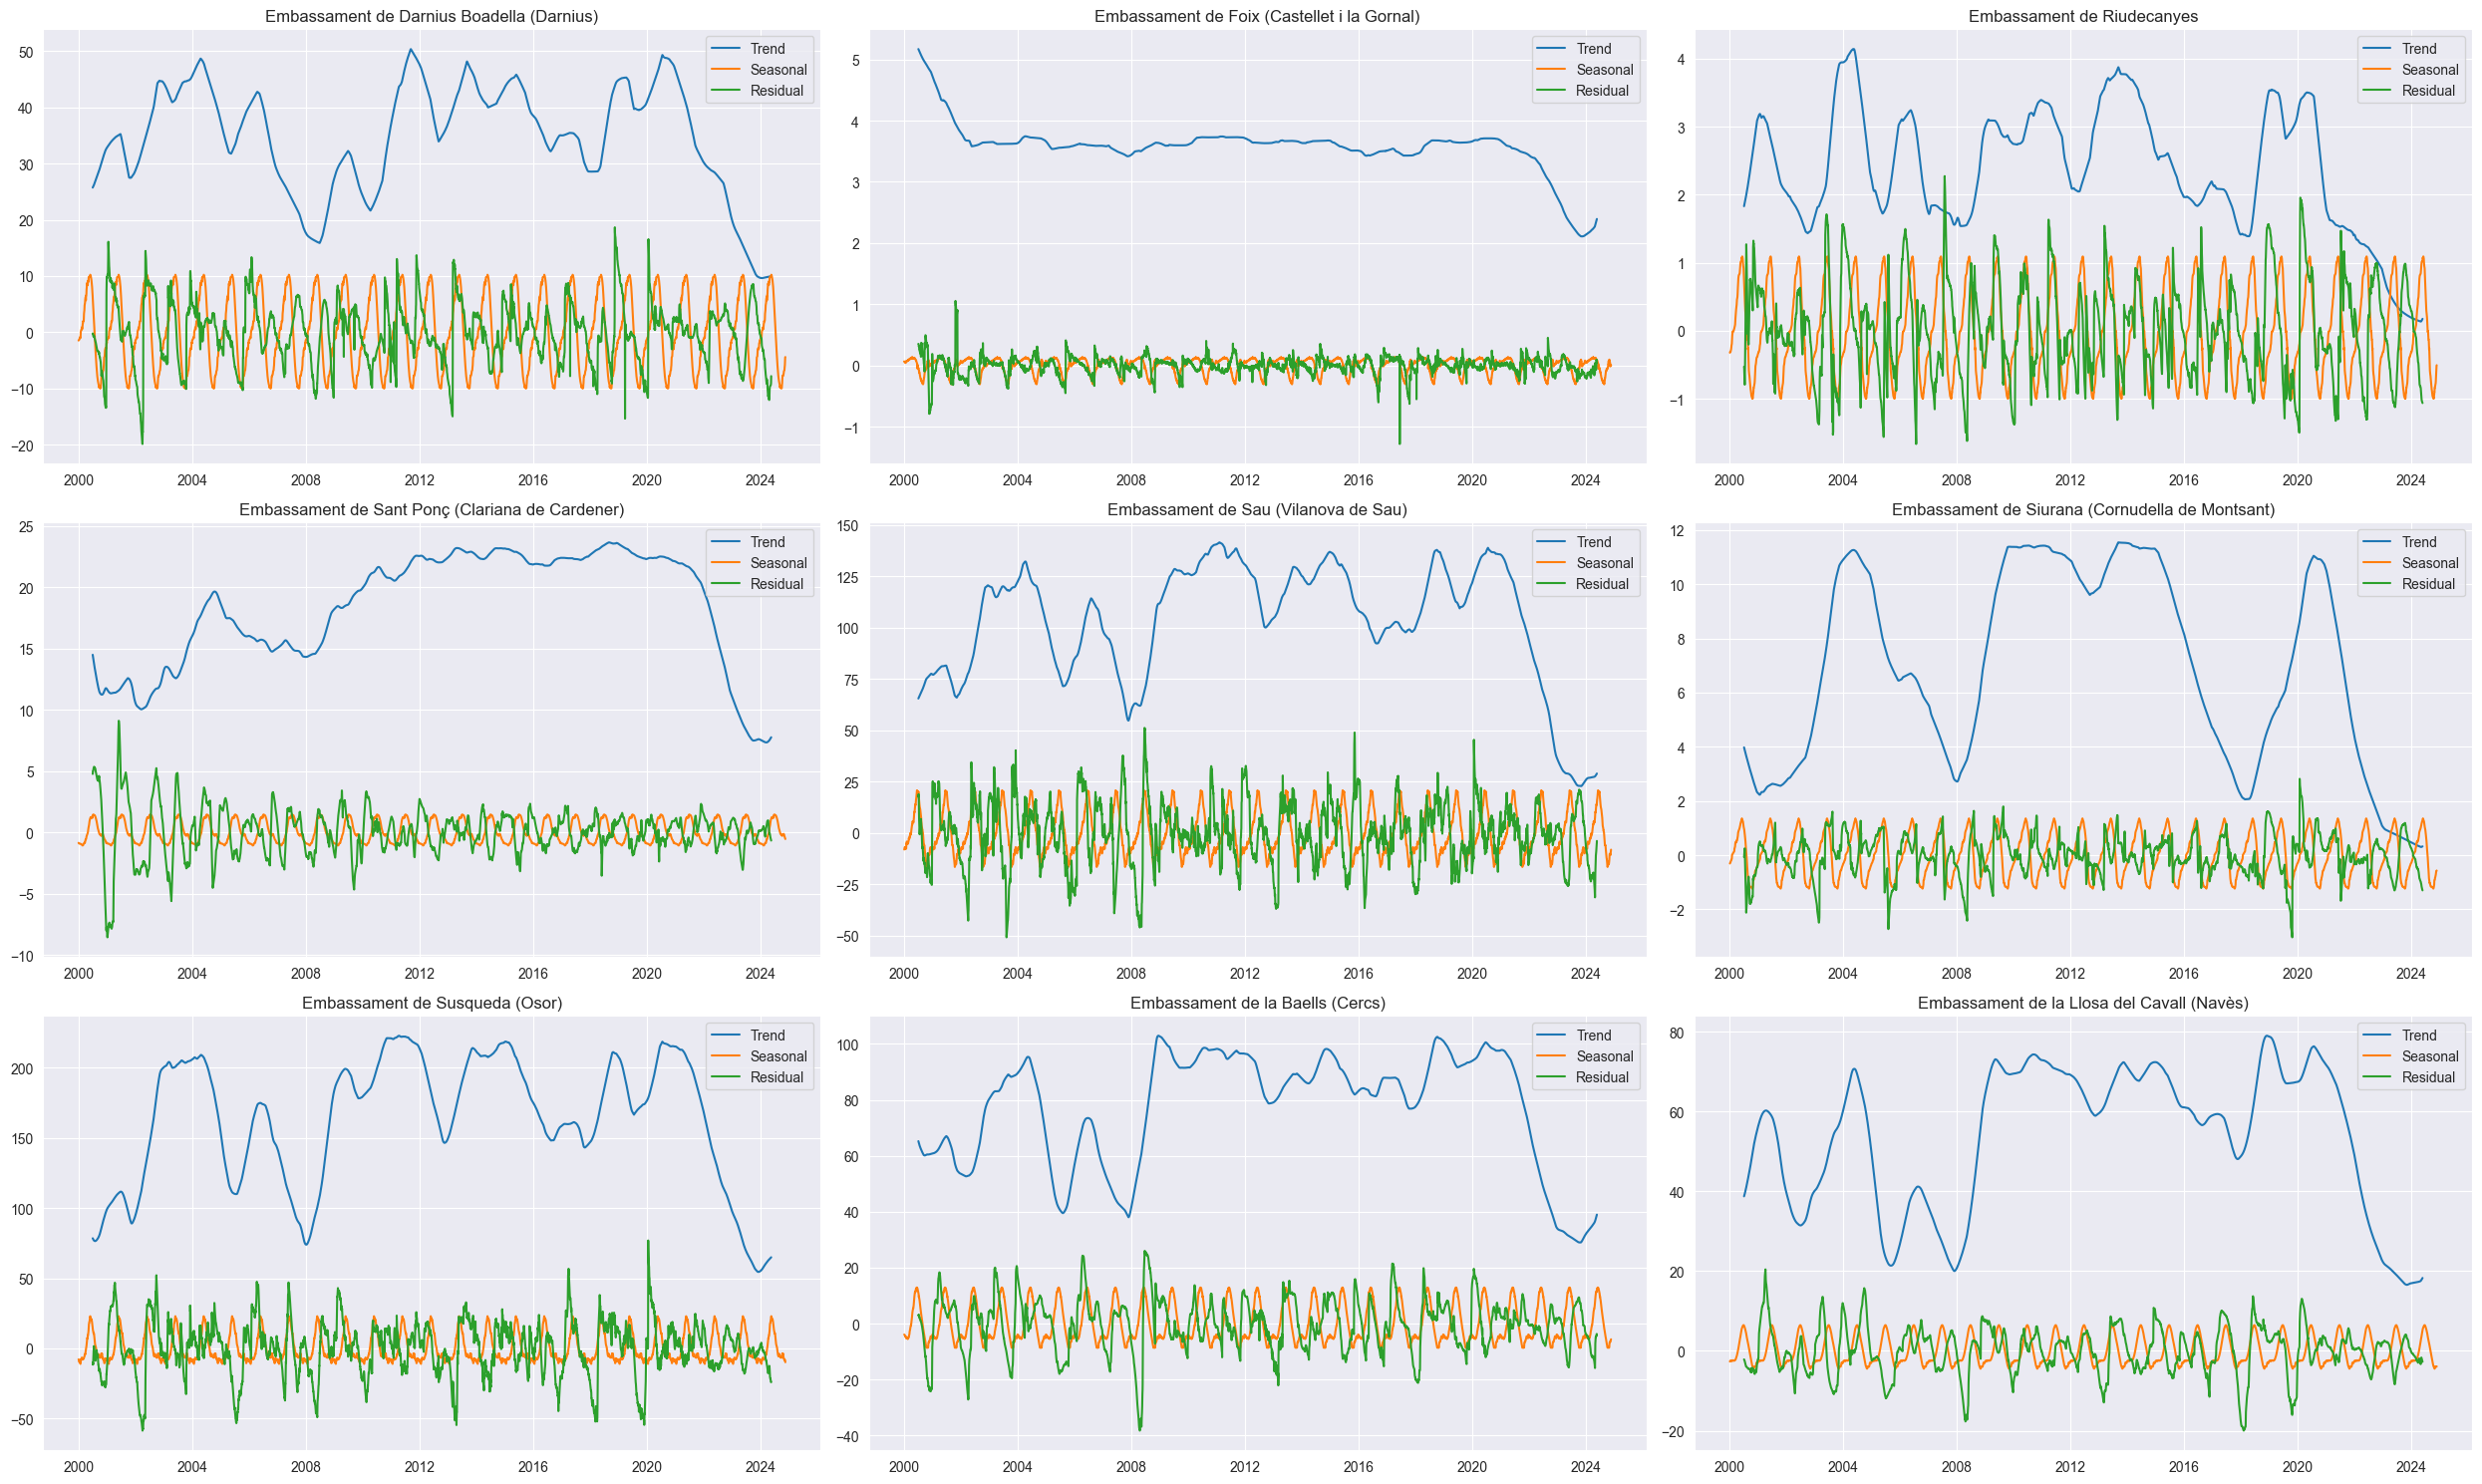

In [8]:
# Seasonal decomposition of the reservoir levels
df_aca_seasonal = df_aca.copy()
df_aca_seasonal['date'] = pd.to_datetime(df_aca_seasonal['date'])
df_aca_seasonal.set_index('date', inplace=True)

# Perform seasonal decomposition on each reservoir level individually (show them on 2 columns)
n_cols = 3
n_rows = int(np.ceil((len(df_aca_seasonal.columns)) / n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(25, 15))
for i, column in enumerate(df_aca_seasonal.columns[:]):
    decomposition = seasonal_decompose(df_aca_seasonal[column], model='additive', period=365)
    axs[i // n_cols, i % n_cols].plot(decomposition.trend, label='Trend')
    axs[i // n_cols, i % n_cols].plot(decomposition.seasonal, label='Seasonal')
    axs[i // n_cols, i % n_cols].plot(decomposition.resid, label='Residual')
    axs[i // n_cols, i % n_cols].legend()
    axs[i // n_cols, i % n_cols].set_title(sensor_map[int(column)])
plt.tight_layout()
plt.show()

Es pot detectar una certa estacionalitat el volum de l'aigua embassada. És cert, però, que aquesta estacionalitat és trencada, en ocasions, per períodes de sequera, el més crític, el dels darrers anys. Tot i això, s'espera que els models puguin ser capaços d'interpetar comportaments de sequera al haver-se donat en situacions anteriors.

#### Meteocat Dataset

In [9]:
# Read the final and cleaned dataset from Meteocat (stations)
df_meteocat = pd.read_csv('model/final_data/processed_meteocat.csv')
print(df_meteocat.head())

         date  1000_C6  1000_C7  1000_C8  1000_C9  1000_CC  1000_CD  1000_CE  \
0  2000-01-01      1.4      3.4      2.8      8.7      2.3      0.8      6.3   
1  2000-01-02      1.4      4.2      3.2      7.7      2.8      0.9      7.0   
2  2000-01-03      1.4      4.8      3.4      7.2      2.3      1.0      6.7   
3  2000-01-04      1.4      1.8      1.4      6.0      0.2      1.3      6.3   
4  2000-01-05      1.4      0.4      0.2      4.7      1.7      1.0      5.4   

   1000_CG  1000_CI  ...  1600_DG  1600_DP  1600_Z1  1600_Z2  1600_Z3  \
0      1.8      0.0  ...      1.0      0.0    104.0      3.0     17.0   
1      2.2      0.5  ...      0.0      0.0    102.0      3.0     15.0   
2      4.9      1.0  ...      0.0      0.0    100.0      3.0     17.0   
3      7.6      0.4  ...      0.0      0.0    100.0      3.0     17.0   
4      5.6      1.1  ...      0.0      0.0     96.0      3.0     15.0   

   1600_Z5  1600_Z6  1600_Z7  1600_Z9  1600_ZB  
0     58.0      0.0     37.0   

In [10]:
# Read the relationship between station codes and the station names for further understanding
df_stations = pd.read_csv('model/final_data/station_codes.csv')
print(df_stations.head())

   station_code codiEstacio
0             1          C7
1             2          C8
2             3          C9
3             4          CC
4             5          CD


In [11]:
df_meteocat.describe().T

,count,mean,std,min,25%,50%,75%,max
1000_C6,9092.0,14.328358,7.598403,-10.0,8.2,14.400000,20.753125,32.225000
1000_C7,9092.0,14.516390,7.742054,-7.5,8.3,14.367708,21.000000,33.697917
1000_C8,9092.0,13.513319,7.558687,-6.8,7.5,13.165625,19.867188,32.137500
1000_C9,9092.0,16.613969,6.192013,-1.8,11.6,16.400000,21.931250,31.172917
1000_CC,9092.0,12.534168,7.132063,-6.2,6.6,12.313393,18.500000,29.947917
...,...,...,...,...,...,...,...,...
1600_Z5,9092.0,348.018609,609.903720,0.0,0.0,56.000000,304.244792,3153.729167
1600_Z6,9092.0,235.532841,436.051611,0.0,0.0,6.332639,183.494792,2099.250000
1600_Z7,9092.0,82.786098,170.591135,0.0,0.0,5.885417,60.000000,1479.291667
1600_Z9,9092.0,192.126739,368.299627,0.0,0.0,33.093750,97.000000,2260.000000


In [12]:
# Grouped data by station
df_1000 = pd.read_csv('data/processed/meteocat/meteocat_1000_daily_all.csv')
df_1300 = pd.read_csv('data/processed/meteocat/meteocat_1300_daily_all.csv')
df_1600 = pd.read_csv('data/processed/meteocat/meteocat_1600_daily_all.csv')

###### PLUJA

In [13]:
# Rain = Var Code 1300
df_1300.head()

,data,codiEstacio,codiVariable,valor
0,2024-12-07,ZE,1300,5.6
1,2024-12-07,ZC,1300,15.1
2,2024-12-07,ZB,1300,3.2
3,2024-12-07,Z9,1300,6.9
4,2024-12-07,Z7,1300,23.7


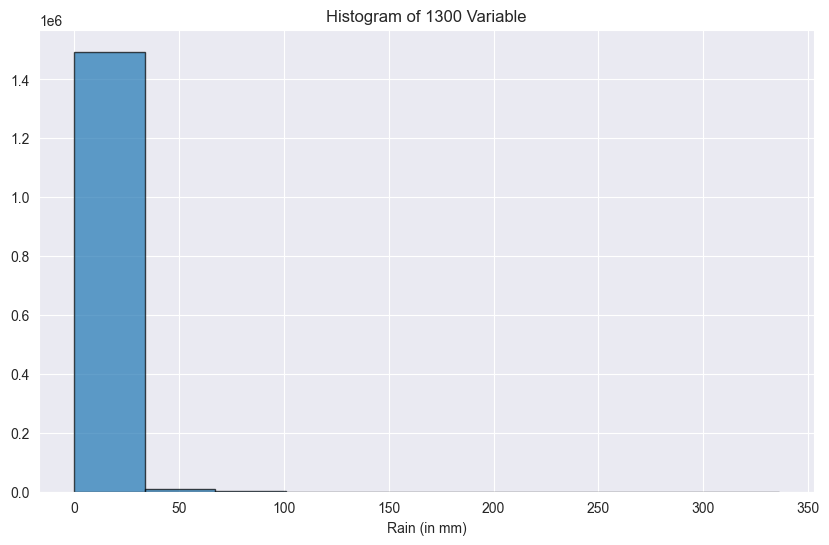

In [14]:
# Histogram of 1300 (rain)
plt.figure(figsize=(10, 6))
plt.hist(df_1300['valor'], bins=10, edgecolor='k', alpha=0.7, )
plt.title('Histogram of 1300 Variable')
plt.xlabel('Rain (in mm)')
plt.show()

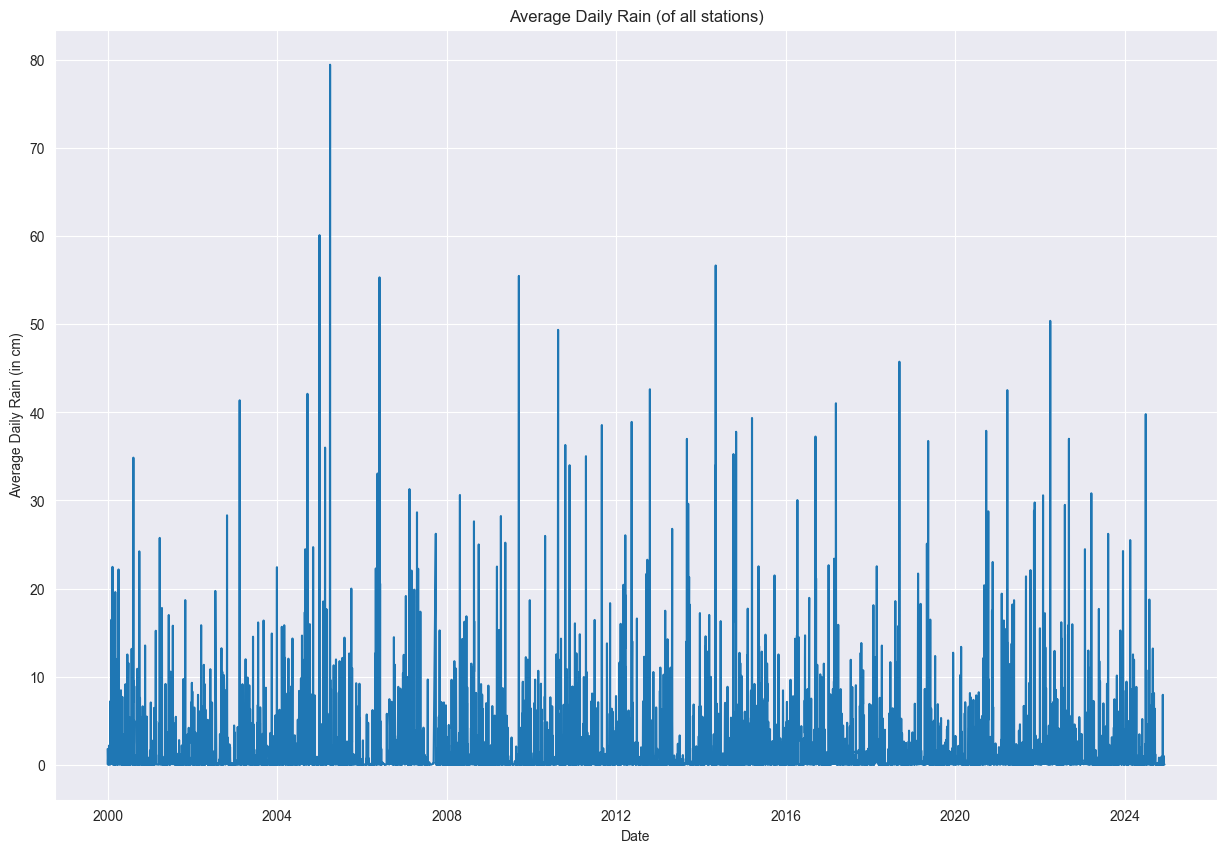

In [15]:
# Plot a line to see stationarity daily rain
df_1300_cvt = df_1300.copy()
df_1300_cvt['data'] = pd.to_datetime(df_1300_cvt['data'])
df_1300_cvt.set_index('data', inplace=True)

plt.figure(figsize=(15, 10))
plt.plot(df_1300_cvt.index.unique(), df_1300_cvt.groupby(df_1300_cvt.index)['valor'].mean())

plt.title('Average Daily Rain (of all stations)')
plt.xlabel('Date')
plt.ylabel('Average Daily Rain (in cm)')
plt.show()

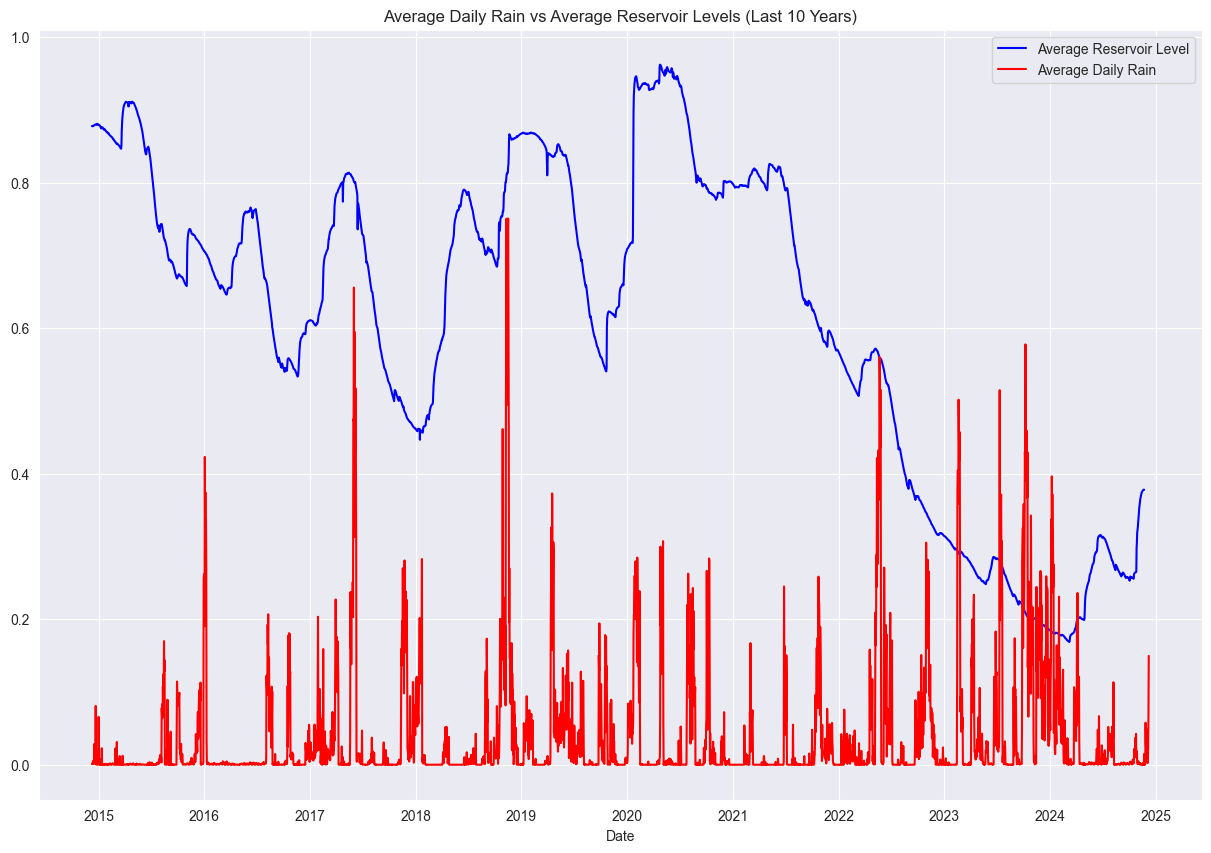

In [16]:
# Comparison between daily rain and reservoirs total level
df_aca_comp = df_aca.copy()
df_1300_comp = df_1300.copy()
df_aca_comp['date'] = pd.to_datetime(df_aca_comp['date'])
df_1300_comp['data'] = pd.to_datetime(df_1600['data'])

# Include only last 20 years for better visualization
start_date = pd.to_datetime('today') - pd.DateOffset(years=10)
df_aca_comp = df_aca_comp[df_aca_comp['date'] >= start_date]
df_1300_comp = df_1300_comp[df_1300_comp['data'] >= start_date]
# Scale the reservoir levels individually (by sensor)
df_aca_scaled = df_aca_comp.copy()
for column in df_aca_comp.columns[1:]:
    df_aca_scaled[column] = df_aca_comp[column] / df_aca_comp[column].max()
# Scale the daily rain values individually (by station)
df_1300_scaled = df_1300_comp.copy()
df_1300_scaled['valor'] = df_1300_comp.groupby('codiEstacio')['valor'].transform(lambda x: x / x.max())
# Calculate the mean for each date and variable
df_aca_mean = df_aca_scaled.groupby('date').mean().mean(axis=1)
df_1300_mean = df_1300_scaled.groupby('data')['valor'].mean()
# Plot results
plt.figure(figsize=(15, 10))
plt.plot(df_aca_mean.index, df_aca_mean, label='Average Reservoir Level', color='blue')
plt.plot(df_1300_mean.index, df_1300_mean, label='Average Daily Rain', color='red')
plt.title('Average Daily Rain vs Average Reservoir Levels (Last 10 Years)')
plt.xlabel('Date')
plt.legend()
plt.show()

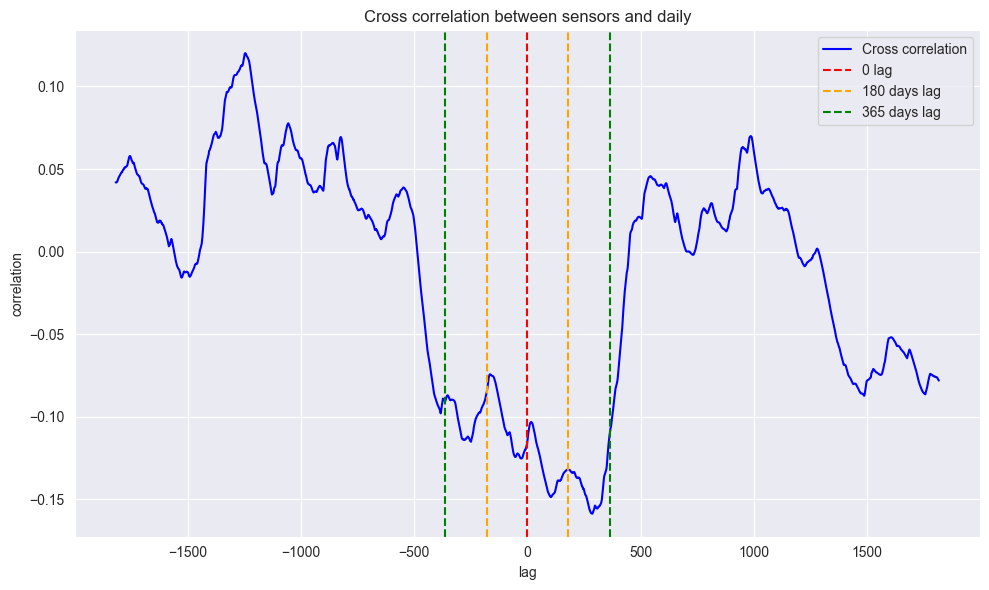

In [17]:
# Correlation study. Normalize and then test cross correlation
x = (df_aca_mean - np.mean(df_aca_mean)) / np.std(df_aca_mean)
y = (df_1300_mean - np.mean(df_1300_mean)) / np.std(df_1300_mean)
y = y[-len(x):]
corr = np.correlate(x, y, mode="same")
corr_norm = corr / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
# Plot to see graphically the information
# Adapt X axis to show correct lag numbers
lags = np.arange(-len(x)//2, len(x)//2)
plt.figure(figsize=(10, 6))
plt.plot(lags, corr_norm, color="blue", label="Cross correlation")
plt.axvline(0, color="red", linestyle="--", label="0 lag")
# Add reference lines
plt.axvline(180, color="orange", linestyle="--", label="180 days lag")
plt.axvline(-180, color="orange", linestyle="--")
plt.axvline(365, color="green", linestyle="--", label="365 days lag")
plt.axvline(-365, color="green", linestyle="--")
plt.title("Cross correlation between sensors and daily")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.legend()
plt.tight_layout()
plt.show()

##### Neu

In [18]:
# Snow = Var Code 1600
df_1600.head()

,data,codiEstacio,codiVariable,valor
0,2024-12-07,ZE,1600,2.0
1,2024-12-07,ZC,1600,0.0
2,2024-12-07,ZB,1600,4.0
3,2024-12-07,Z9,1600,5.0
4,2024-12-07,Z7,1600,10.0


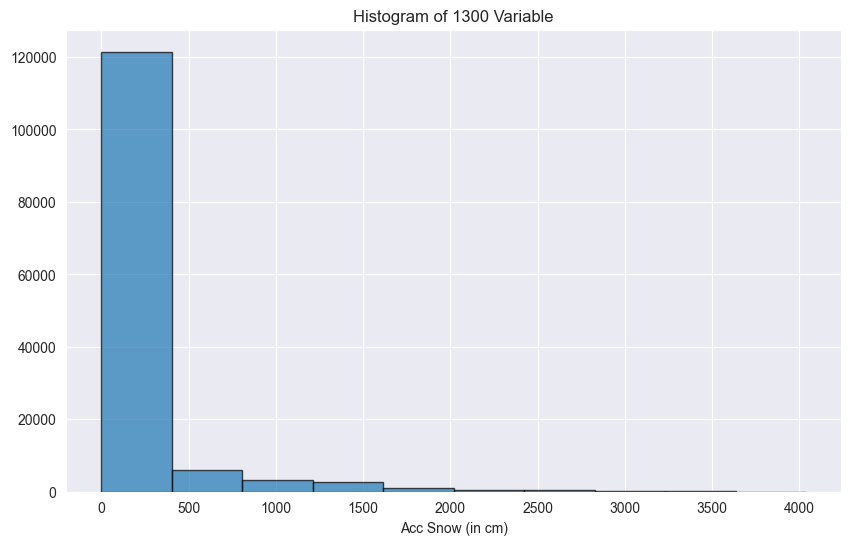

In [19]:
# Histogram of 1600 (snow)
plt.figure(figsize=(10, 6))
plt.hist(df_1600['valor'], bins=10, edgecolor='k', alpha=0.7, )
plt.title('Histogram of 1300 Variable')
plt.xlabel('Acc Snow (in cm)')
plt.show()

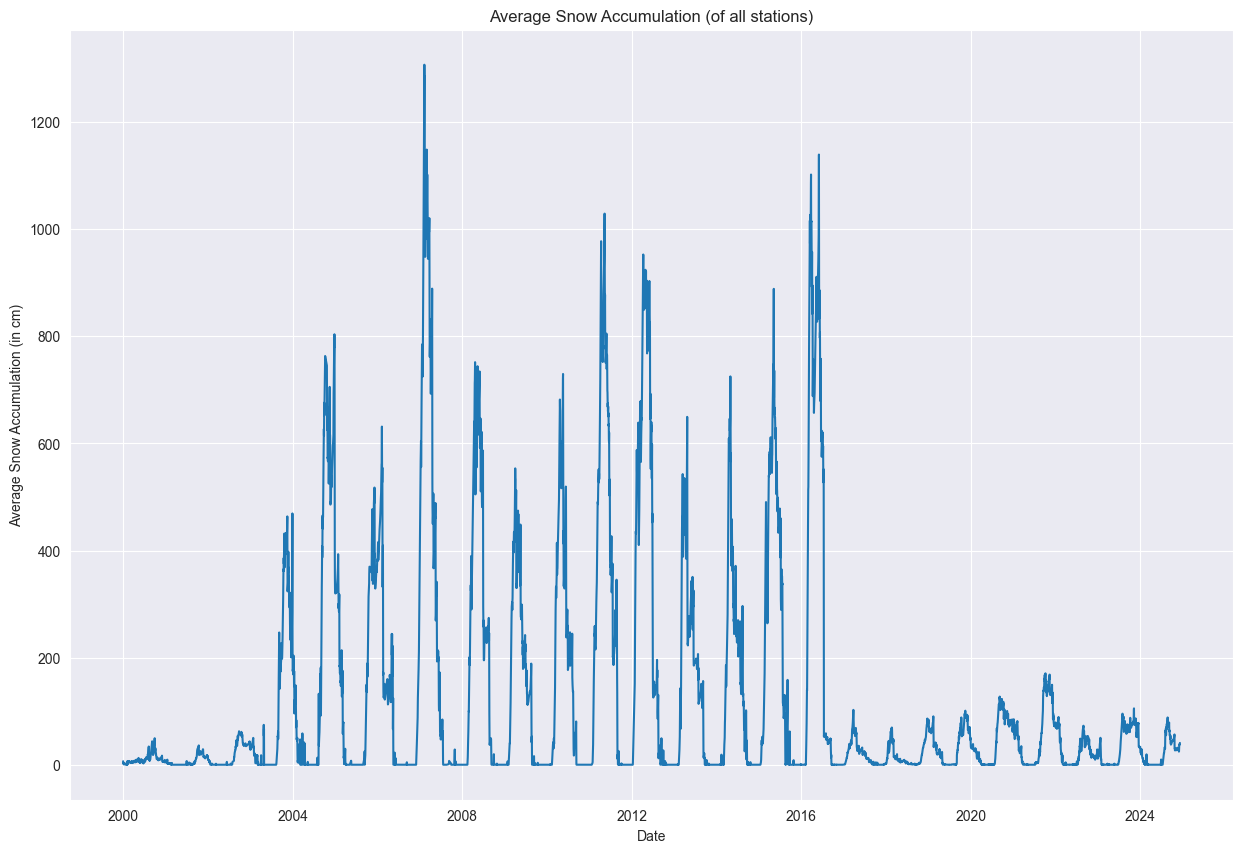

In [20]:
# Plot a line to see stationarity in snow accumulation
df_1600_cvt = df_1600.copy()
df_1600_cvt['data'] = pd.to_datetime(df_1600_cvt['data'])
df_1600_cvt.set_index('data', inplace=True)

plt.figure(figsize=(15, 10))
plt.plot(df_1600_cvt.index.unique(), df_1600_cvt.groupby(df_1600_cvt.index)['valor'].mean())

plt.title('Average Snow Accumulation (of all stations)')
plt.xlabel('Date')
plt.ylabel('Average Snow Accumulation (in cm)')
plt.show()

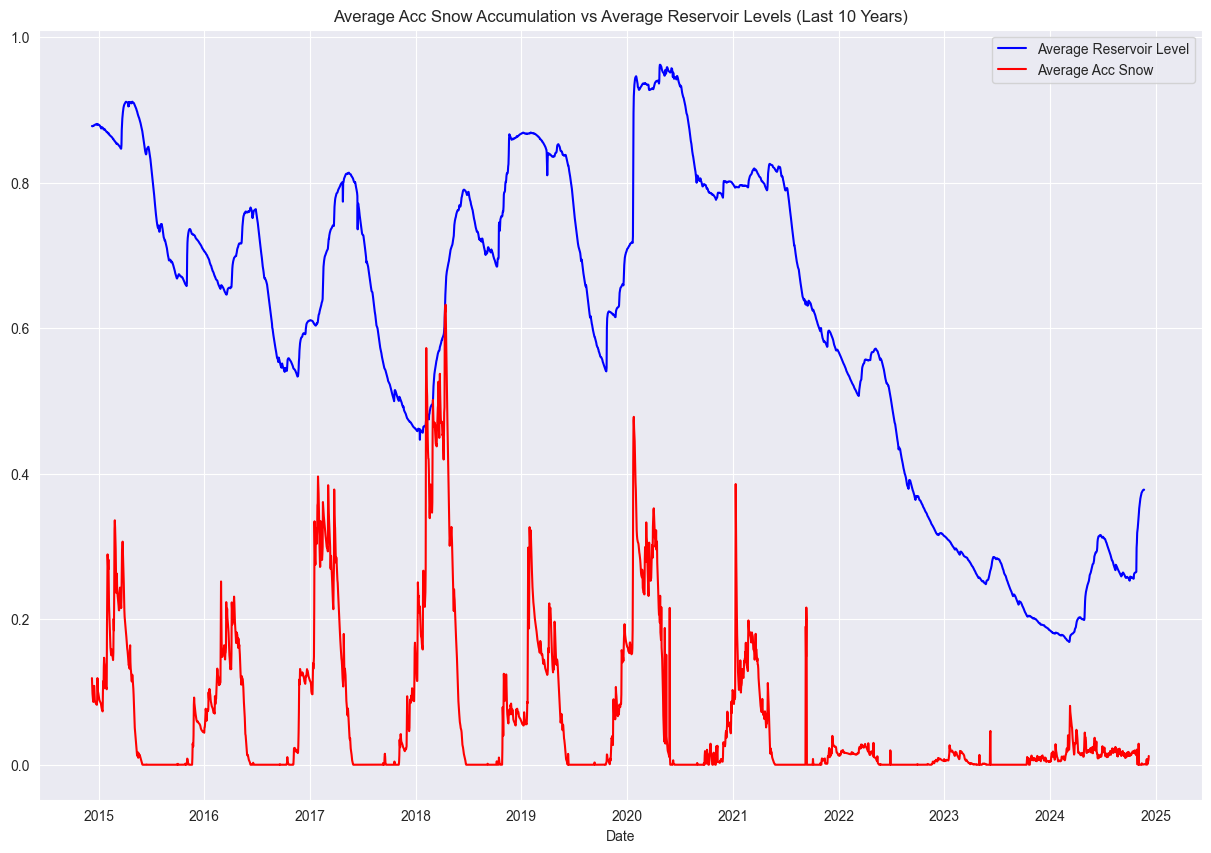

In [21]:
# Comparison between acc snow and reservoirs total level
df_aca_comp = df_aca.copy()
df_1600_comp = df_1600.copy()
df_aca_comp['date'] = pd.to_datetime(df_aca_comp['date'])
df_1600_comp['data'] = pd.to_datetime(df_1600['data'])

# Include only last 20 years for better visualization
start_date = pd.to_datetime('today') - pd.DateOffset(years=10)
df_aca_comp = df_aca_comp[df_aca_comp['date'] >= start_date]
df_1600_comp = df_1600_comp[df_1600_comp['data'] >= start_date]
# Scale the reservoir levels individually (by sensor)
df_aca_scaled = df_aca_comp.copy()
for column in df_aca_comp.columns[1:]:
    df_aca_scaled[column] = df_aca_comp[column] / df_aca_comp[column].max()
# Scale the snow accumulation values individually (by station)
df_1600_scaled = df_1600_comp.copy()
df_1600_scaled['valor'] = df_1600_comp.groupby('codiEstacio')['valor'].transform(lambda x: x / x.max())
# Calculate the mean for each date and variable
df_aca_mean = df_aca_scaled.groupby('date').mean().mean(axis=1)
df_1600_mean = df_1600_scaled.groupby('data')['valor'].mean()
# Plot results
plt.figure(figsize=(15, 10))
plt.plot(df_aca_mean.index, df_aca_mean, label='Average Reservoir Level', color='blue')
plt.plot(df_1600_mean.index, df_1600_mean, label='Average Acc Snow', color='red')
plt.title('Average Acc Snow Accumulation vs Average Reservoir Levels (Last 10 Years)')
plt.xlabel('Date')
plt.legend()
plt.show()

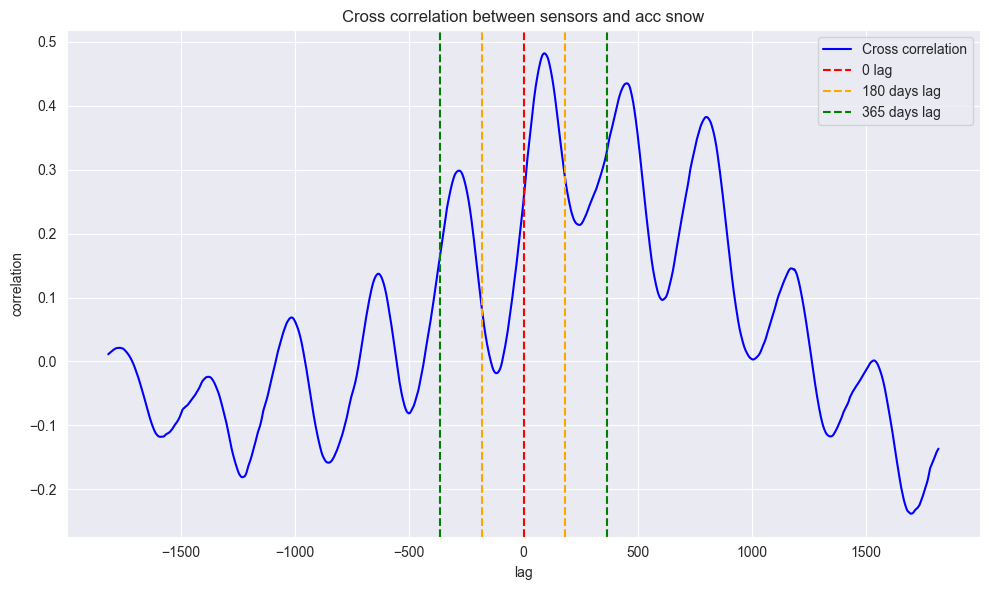

In [22]:
# Correlation study. Normalize and then test cross correlation
x = (df_aca_mean - np.mean(df_aca_mean)) / np.std(df_aca_mean)
y = (df_1600_mean - np.mean(df_1600_mean)) / np.std(df_1600_mean)
y = y[-len(x):]
corr = np.correlate(x, y, mode="same")
corr_norm = corr / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
# Plot to see graphically the information
# Adapt X axis to show correct lag numbers
lags = np.arange(-len(x)//2, len(x)//2)
plt.figure(figsize=(10, 6))
plt.plot(lags, corr_norm, color="blue", label="Cross correlation")
plt.axvline(0, color="red", linestyle="--", label="0 lag")
# Add reference lines
plt.axvline(180, color="orange", linestyle="--", label="180 days lag")
plt.axvline(-180, color="orange", linestyle="--")
plt.axvline(365, color="green", linestyle="--", label="365 days lag")
plt.axvline(-365, color="green", linestyle="--")
plt.title("Cross correlation between sensors and acc snow")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.legend()
plt.tight_layout()
plt.show()

##### Temperatura

In [23]:
# Temperature = Var Code 1000
df_1000.head()

,data,codiEstacio,codiVariable,valor
0,2024-12-07,ZE,1000,-0.195455
1,2024-12-07,ZD,1000,-1.136364
2,2024-12-07,ZC,1000,-0.420455
3,2024-12-07,ZB,1000,-1.552273
4,2024-12-07,Z9,1000,1.390909


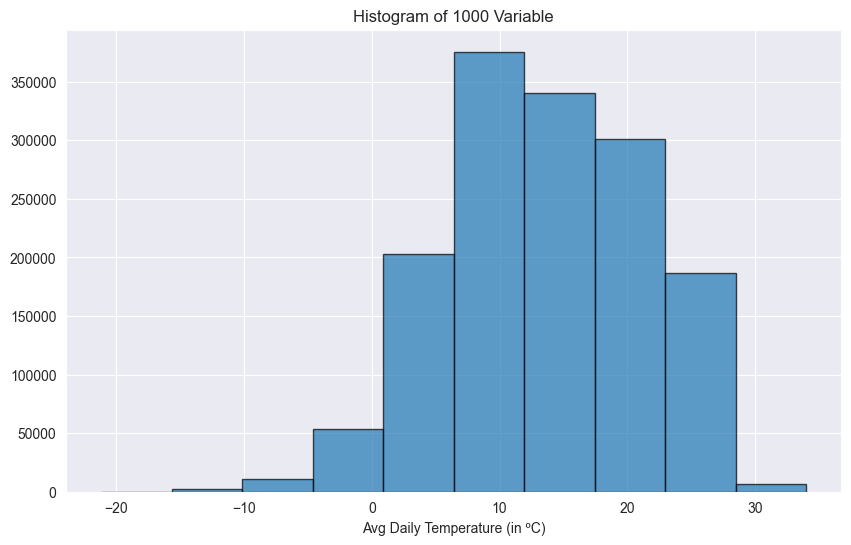

In [24]:
# Histogram of 1000 (temperature)
plt.figure(figsize=(10, 6))
plt.hist(df_1000['valor'], bins=10, edgecolor='k', alpha=0.7, )
plt.title('Histogram of 1000 Variable')
plt.xlabel('Avg Daily Temperature (in ºC)')
plt.show()

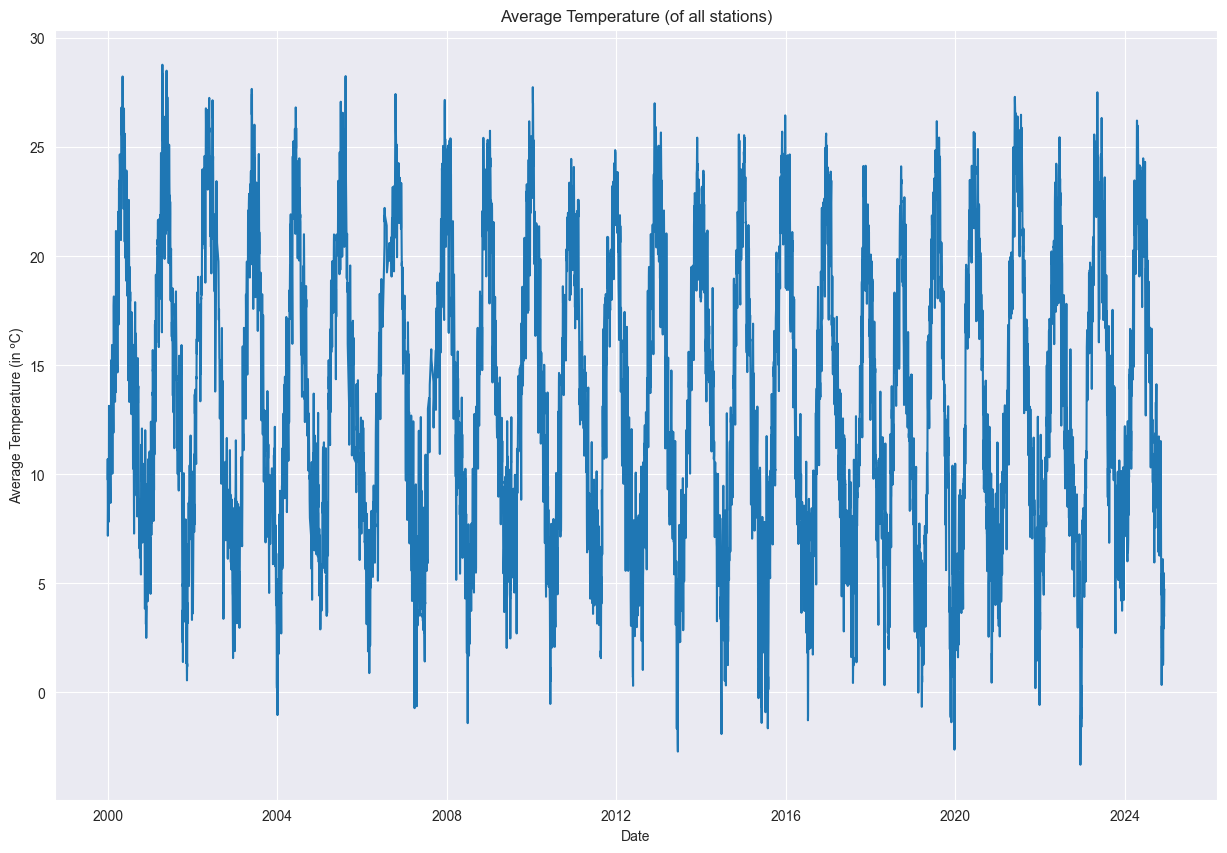

In [25]:
# Plot a line to see stationarity in snow accumulation
df_1000_cvt = df_1000.copy()
df_1000_cvt['data'] = pd.to_datetime(df_1000_cvt['data'])
df_1000_cvt.set_index('data', inplace=True)

plt.figure(figsize=(15, 10))
plt.plot(df_1000_cvt.index.unique(), df_1000_cvt.groupby(df_1000_cvt.index)['valor'].mean())

plt.title('Average Temperature (of all stations)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (in ºC)')
plt.show()

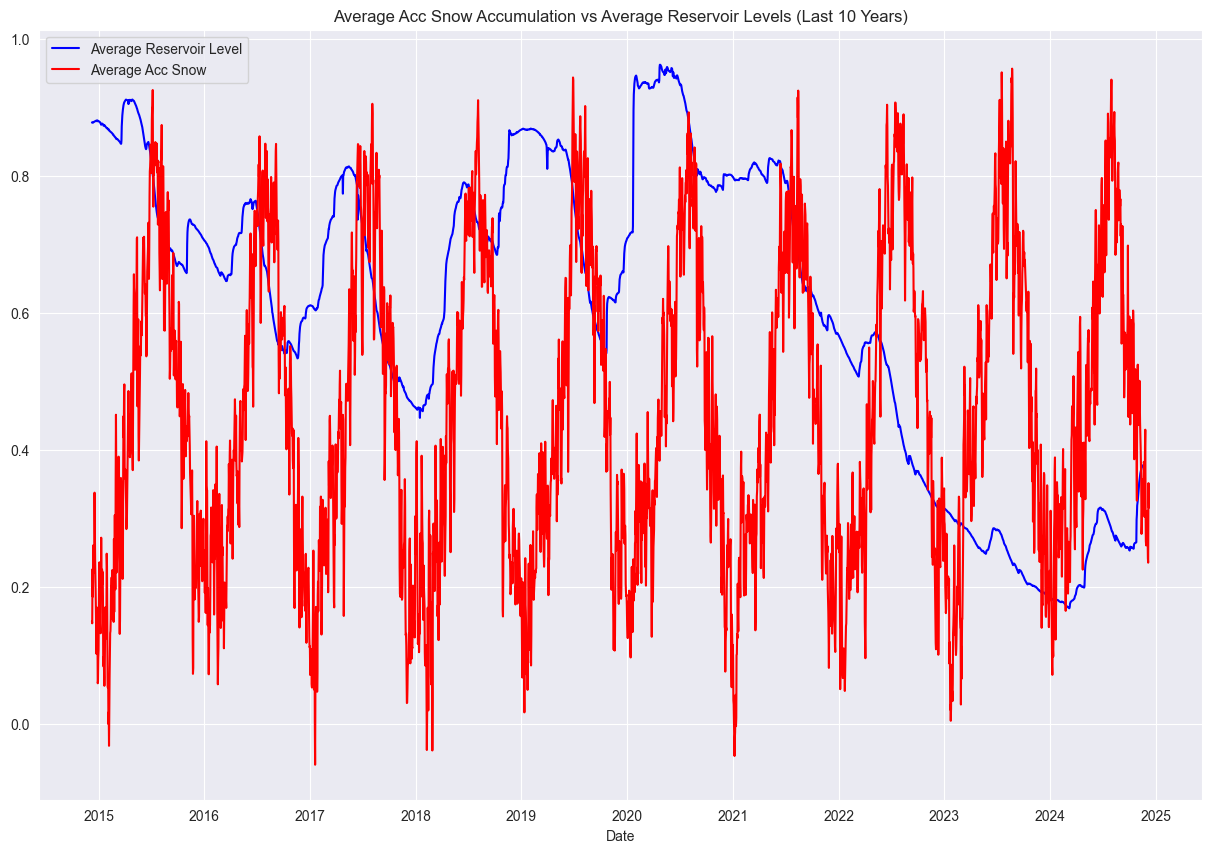

In [26]:
# Comparison between temperature and reservoirs total level
df_aca_comp = df_aca.copy()
df_1000_comp = df_1000.copy()
df_aca_comp['date'] = pd.to_datetime(df_aca_comp['date'])
df_1000_comp['data'] = pd.to_datetime(df_1000['data'])

# Include only last 20 years for better visualization
start_date = pd.to_datetime('today') - pd.DateOffset(years=10)
df_aca_comp = df_aca_comp[df_aca_comp['date'] >= start_date]
df_1000_comp = df_1000_comp[df_1000_comp['data'] >= start_date]
# Scale the reservoir levels individually (by sensor)
df_aca_scaled = df_aca_comp.copy()
for column in df_aca_comp.columns[1:]:
    df_aca_scaled[column] = df_aca_comp[column] / df_aca_comp[column].max()
# Scale the snow accumulation values individually (by station)
df_1000_scaled = df_1000_comp.copy()
df_1000_scaled['valor'] = df_1000_comp.groupby('codiEstacio')['valor'].transform(lambda x: x / x.max())
# Calculate the mean for each date and variable
df_aca_mean = df_aca_scaled.groupby('date').mean().mean(axis=1)
df_1000_mean = df_1000_scaled.groupby('data')['valor'].mean()
# Plot results
plt.figure(figsize=(15, 10))
plt.plot(df_aca_mean.index, df_aca_mean, label='Average Reservoir Level', color='blue')
plt.plot(df_1000_mean.index, df_1000_mean, label='Average Acc Snow', color='red')
plt.title('Average Acc Snow Accumulation vs Average Reservoir Levels (Last 10 Years)')
plt.xlabel('Date')
plt.legend()
plt.show()

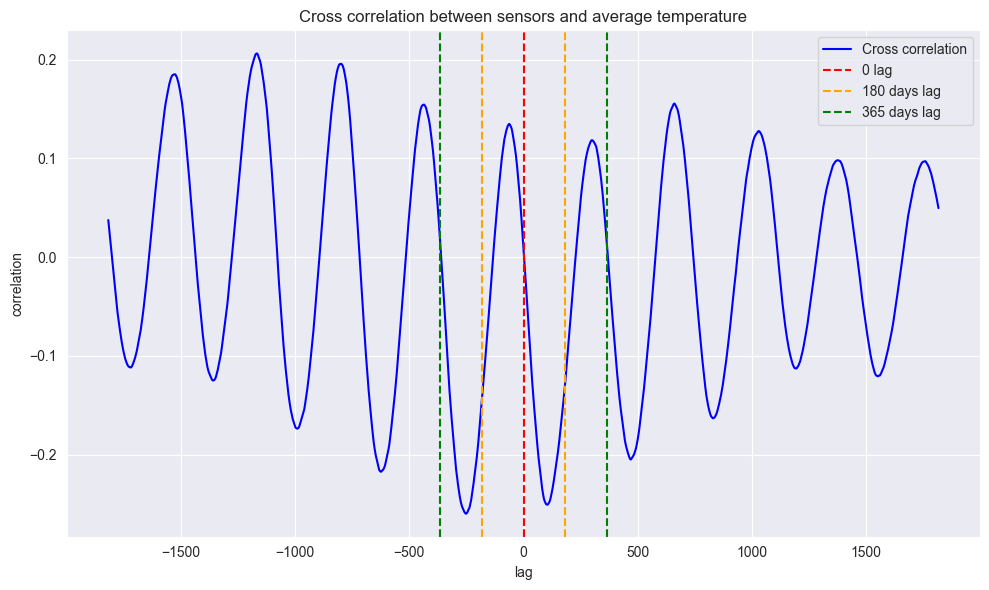

In [27]:
# Correlation study. Normalize and then test cross correlation
x = (df_aca_mean - np.mean(df_aca_mean)) / np.std(df_aca_mean)
y = (df_1000_mean - np.mean(df_1000_mean)) / np.std(df_1000_mean)
y = y[-len(x):]
corr = np.correlate(x, y, mode="same")
corr_norm = corr / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
# Plot to see graphically the information
# Adapt X axis to show correct lag numbers
lags = np.arange(-len(x)//2, len(x)//2)
plt.figure(figsize=(10, 6))
plt.plot(lags, corr_norm, color="blue", label="Cross correlation")
plt.axvline(0, color="red", linestyle="--", label="0 lag")
# Add reference lines
plt.axvline(180, color="orange", linestyle="--", label="180 days lag")
plt.axvline(-180, color="orange", linestyle="--")
plt.axvline(365, color="green", linestyle="--", label="365 days lag")
plt.axvline(-365, color="green", linestyle="--")
plt.title("Cross correlation between sensors and average temperature")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.legend()
plt.tight_layout()
plt.show()